<a href="https://colab.research.google.com/github/bened18/proyecto-integrador-1-taller-2/blob/master/IMDBAnalyticsColab/IMDBAnalyticsColab_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: 



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 15:40:36--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 172.253.63.102, 172.253.63.100, 172.253.63.113, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ejbfp0l5f8iii8rqfk9216fkbqchdug0/1677771600000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=d424314f-ae95-4a43-89a8-e590d80f5e67 [following]
--2023-03-02 15:40:39--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ejbfp0l5f8iii8rqfk9216fkbqchdug0/1677771600000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=d424314f-ae95-4a43-89a8-e590d80f5e67
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 142.251.163.132, 2607:f8b0


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [37]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()
df.loc[50:100,"color"]


50     Color
51     Color
52     Color
53     Color
54     Color
55     Color
56     Color
57     Color
58     Color
59     Color
60     Color
61     Color
62     Color
63     Color
64     Color
65     Color
66     Color
67     Color
68     Color
69     Color
70     Color
71     Color
72     Color
73     Color
74     Color
75     Color
76     Color
77     Color
78     Color
79     Color
80     Color
81     Color
82     Color
83     Color
84     Color
85     Color
86     Color
87     Color
88     Color
89     Color
90     Color
91     Color
92     Color
93     Color
94     Color
95     Color
96     Color
97     Color
98     Color
99     Color
100    Color
Name: color, dtype: object

**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

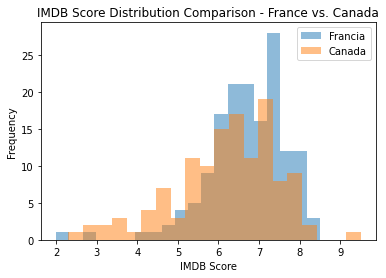

In [31]:
movies_france = df[df['country'] == 'France']
movies_canada = df[df['country'] == 'Canada']

plt.hist(movies_france['imdb_score'], alpha=0.5, label='Francia', bins=20)
plt.hist(movies_canada['imdb_score'], alpha=0.5, label='Canada', bins=20)
plt.legend(loc='upper right')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title('IMDB Score Distribution Comparison - France vs. Canada')
plt.show()


**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

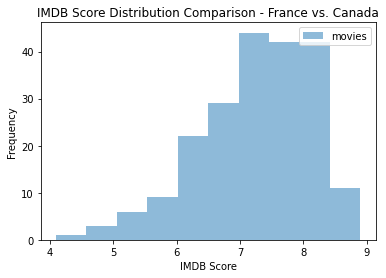

In [51]:
bw_movies = df[df['color'] == ' Black and White']

plt.hist(bw_movies['imdb_score'], alpha=0.5, label='movies', bins=10)
plt.legend(loc='upper right')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title('IMDB Score Distribution Comparison - France vs. Canada')
plt.show()


**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



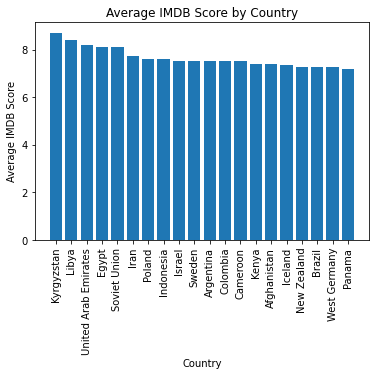

In [47]:
avg_score_by_country = df.groupby('country')['imdb_score'].mean()

avg_score_by_country = avg_score_by_country.sort_values(ascending=False).head(20)


plt.bar(avg_score_by_country.index, avg_score_by_country.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average IMDB Score')
plt.title('Average IMDB Score by Country')
plt.show()

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [50]:
bw_movies = len(df[df['color'] == ' Black and White'])
color_movies = len(df[df['color'] == 'Color'])

print(f'Hay {bw_movies} películas en blanco y negro y {color_movies} películas en color.')

Hay 209 películas en blanco y negro y 4815 películas en color.


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

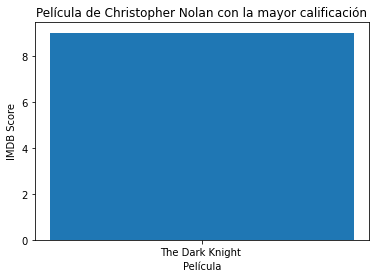

In [52]:
nolan_movies = df[df['director_name'] == 'Christopher Nolan'].sort_values('imdb_score', ascending=False)

# Obtener el título y la calificación de la película con la mayor calificación
best_nolan_movie = nolan_movies.iloc[0]
best_title = best_nolan_movie['movie_title']
best_score = best_nolan_movie['imdb_score']

# Crear una figura de barras para visualizar los resultados
plt.bar(best_title, best_score)
plt.xlabel('Película')
plt.ylabel('IMDB Score')
plt.title('Película de Christopher Nolan con la mayor calificación')
plt.show()

**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

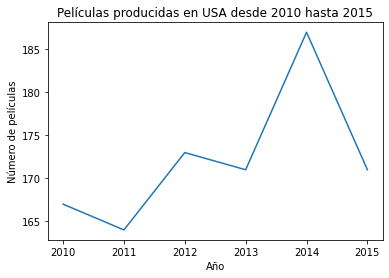

In [53]:
# Seleccionar las películas producidas en USA desde el 2010 hasta el 2015
us_movies = df[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

# Agrupar las películas por año y contar el número de películas producidas cada año
movies_by_year = us_movies.groupby('title_year')['movie_title'].count()

# Crear un gráfico de línea para visualizar los resultados
plt.plot(movies_by_year.index, movies_by_year.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Películas producidas en USA desde 2010 hasta 2015')
plt.show()

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [54]:
# Calcular el imdb_score promedio por país
avg_scores = df.groupby('country')['imdb_score'].mean().reset_index()

# Generar el mapa
fig = px.choropleth(avg_scores, locations='country', locationmode='country names', color='imdb_score',
                    title='IMDB Score Promedio por País', hover_name='country', color_continuous_scale='YlOrRd')
fig.show()

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


In [ ]:
FINOR almacenara informacion de los gastos de los clientes, de sus metas de ahorro, de sus ingresos mensuales, almacena tambien la categoria de sus gastos.

Asi que podemos utilizar la informacion de la siguiente manera:
1. Ingresos mensuales = podemos saber cual es la media de los ingresos mensuales de nuestros usuarios.
2. Gastos mensuales = podemos saber el promedio de gastos mensuales de los usuarios dependiendo sus ingresos mensuales.
3. metas de ahorros = podemos saber en promedio cuanto quieren ahorrar los usuarios dependiendo sus objetivos e ingresos.
4. categoria de gastos = podemos saber en que gastan mas los usuarios, que son mas propensos a comprar y que no.